# Unsupervised learning methods are applied to the MNIST datasets

## 1. Load MNIST dataset
Dataset of MNIST images is loaded: two datasets for training and test ($N_{train}=60,000, N_{test}=10,000$).

In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

In [25]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalised the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0 

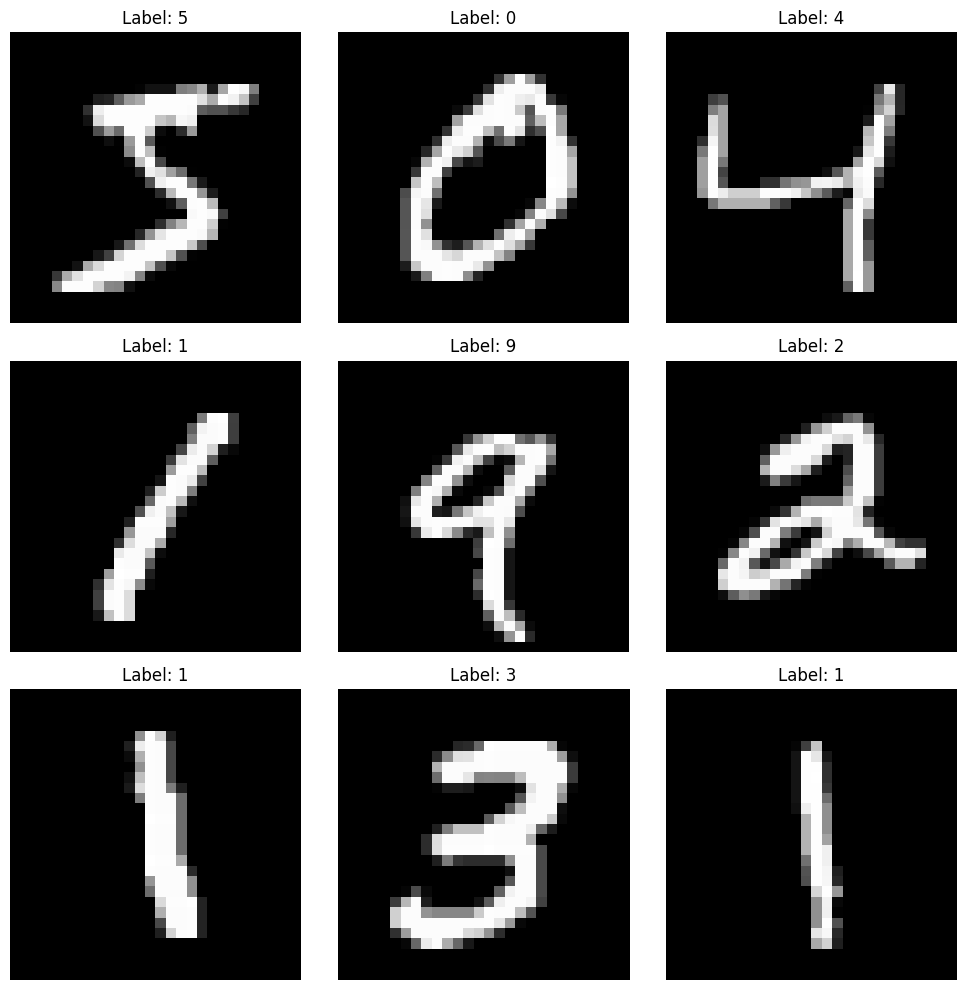

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        axes[i, j].imshow(x_train[idx], cmap='gray')
        axes[i, j].set_title(f"Label: {y_train[idx]}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [27]:
x_test_pr = x_test

In [28]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

## 2. $k$-nearest neighbors (k-NN) method
First, k-nearest neighbors (k-NN) method is applied.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [43]:
y_pred_kNN=y_pred

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

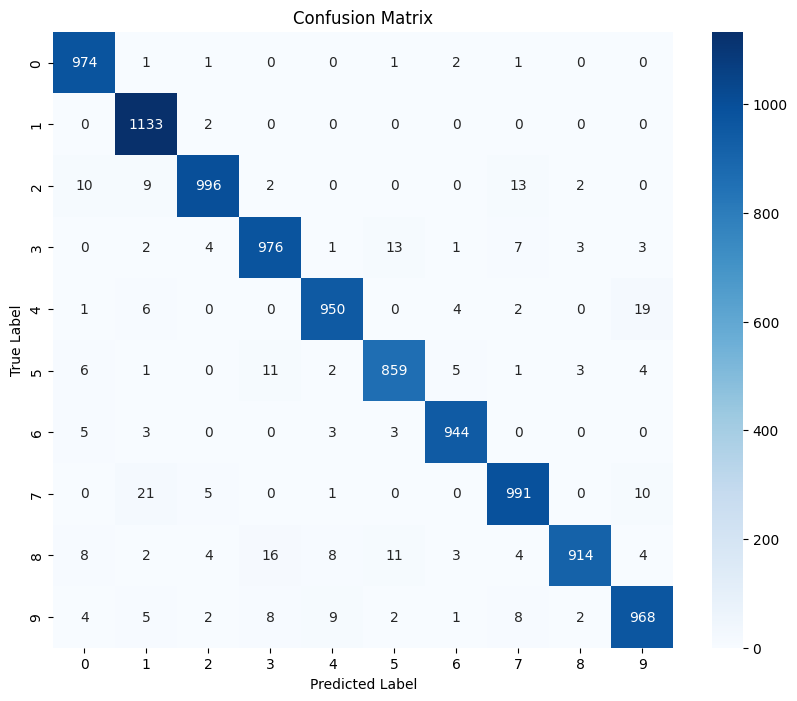

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The performance is very good!!

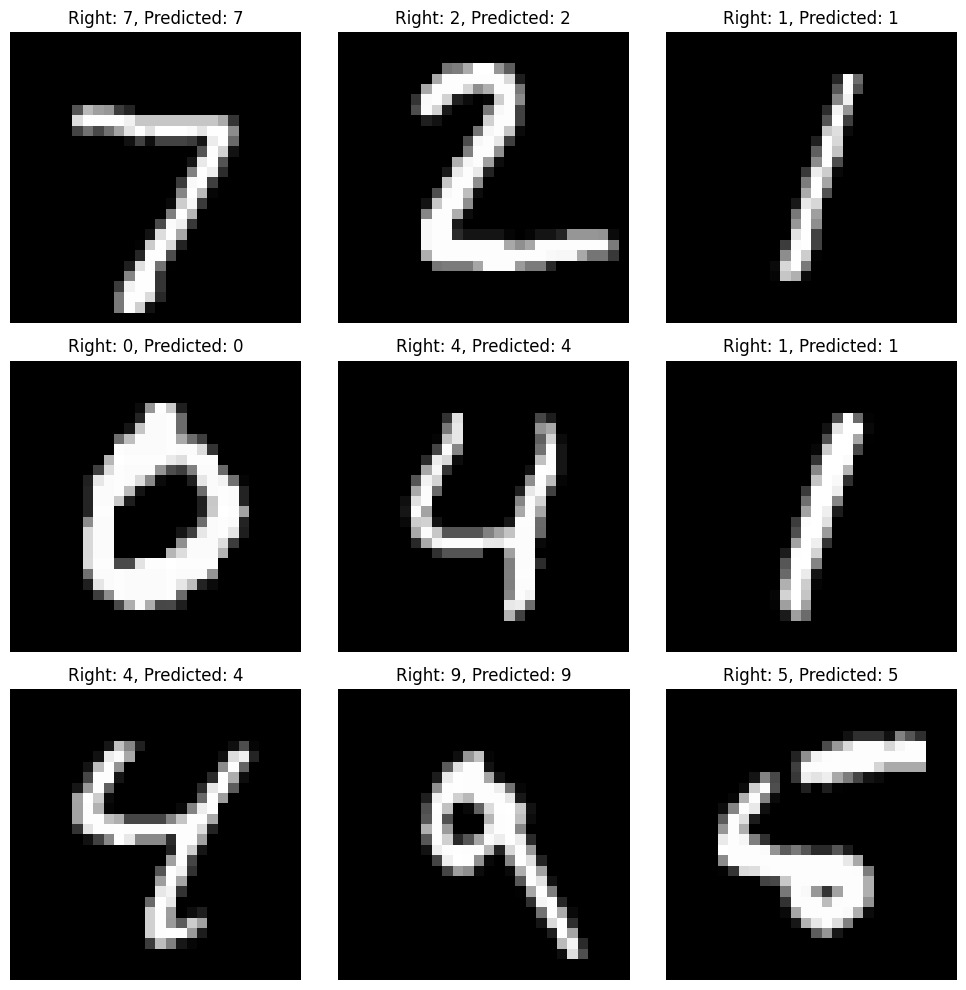

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        axes[i, j].imshow(x_test_pr[idx], cmap='gray')
        axes[i, j].set_title(f"Right: {y_test[idx]}, Predicted: {y_pred[idx]}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

## 3. Agglomerative Clustering
As another unsupervised learning algorithm, Agglomerative Clustering method is tested.
In this case, there is no training, hence it is directy applied to test datasets. 

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg.fit_predict(x_test)

In [12]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_test, labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.6063


Confusin matrix is obtained, but there is no correspondance between the obtained labels and y_test.

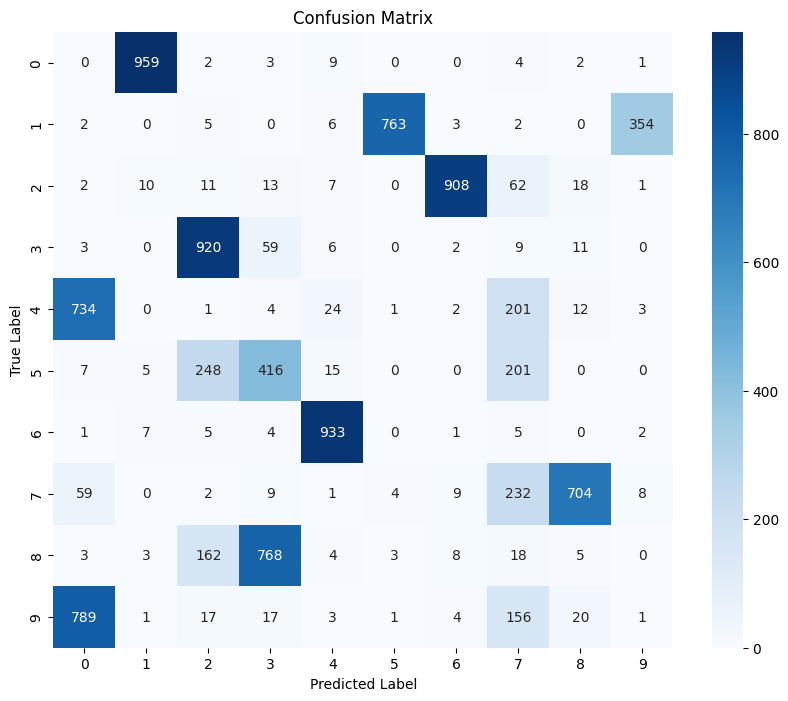

In [13]:
cm = confusion_matrix(y_test, labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Then, the Hangarian method is applied to obtain the appropriate confusion matrix.

In [14]:
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(-cm)

In [15]:
label_map = dict(zip(col_ind, row_ind))

In [16]:
y_matched = np.array([label_map[c] for c in labels])

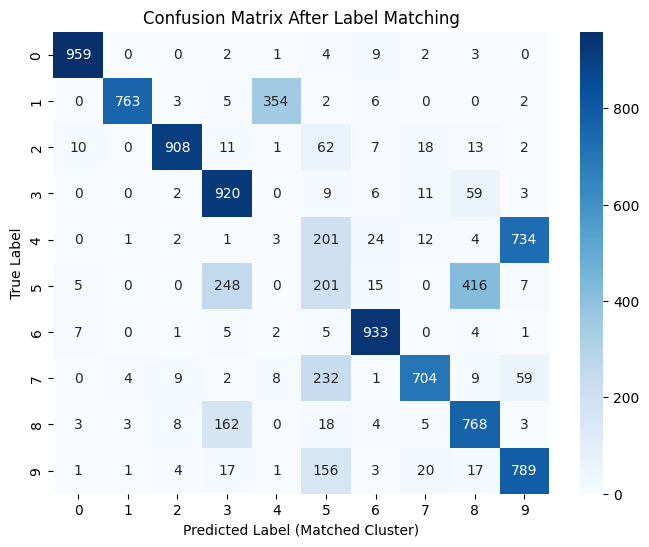

In [17]:
cm_matched = confusion_matrix(y_test, y_matched)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matched, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label (Matched Cluster)")
plt.ylabel("True Label")
plt.title("Confusion Matrix After Label Matching")
plt.show()

Unfortunately, the performance is not so good...

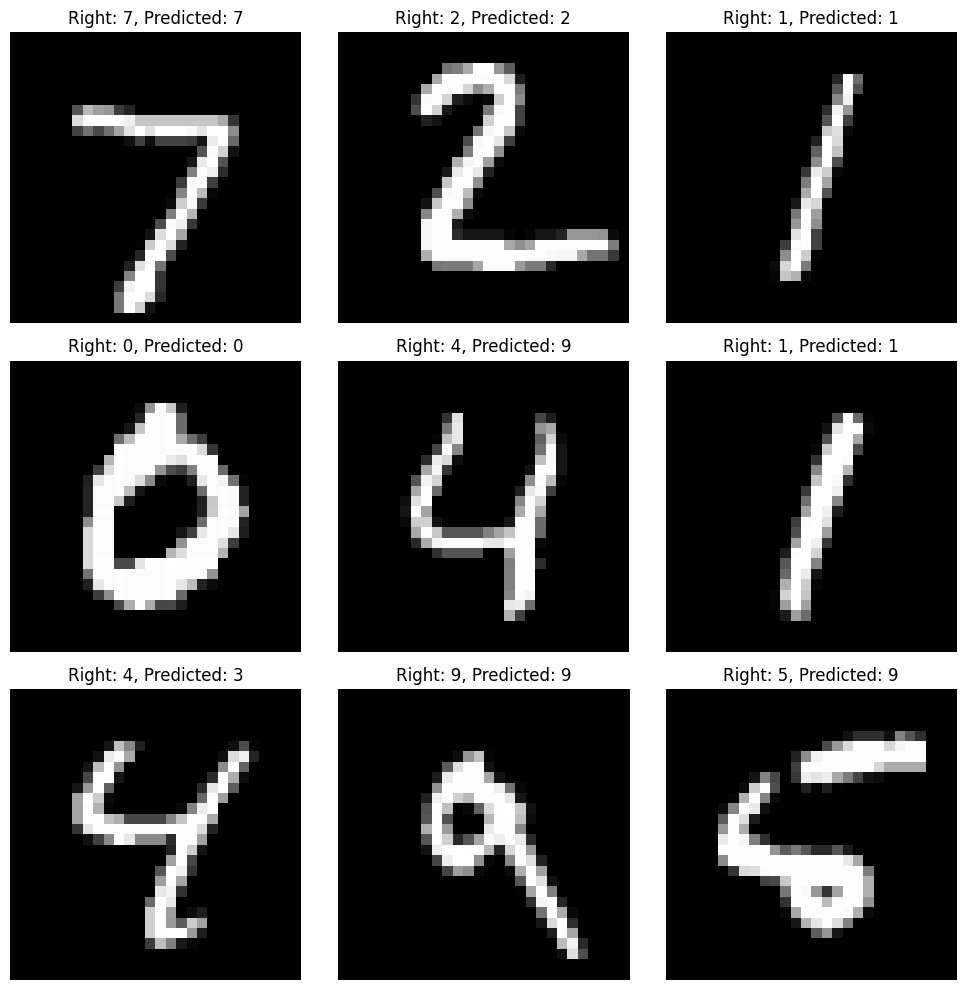

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        axes[i, j].imshow(x_test_pr[idx], cmap='gray')
        axes[i, j].set_title(f"Right: {y_test[idx]}, Predicted: {y_matched[idx]}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

The dendrogram is illustrated!

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
Z = linkage(x_test, method='ward')

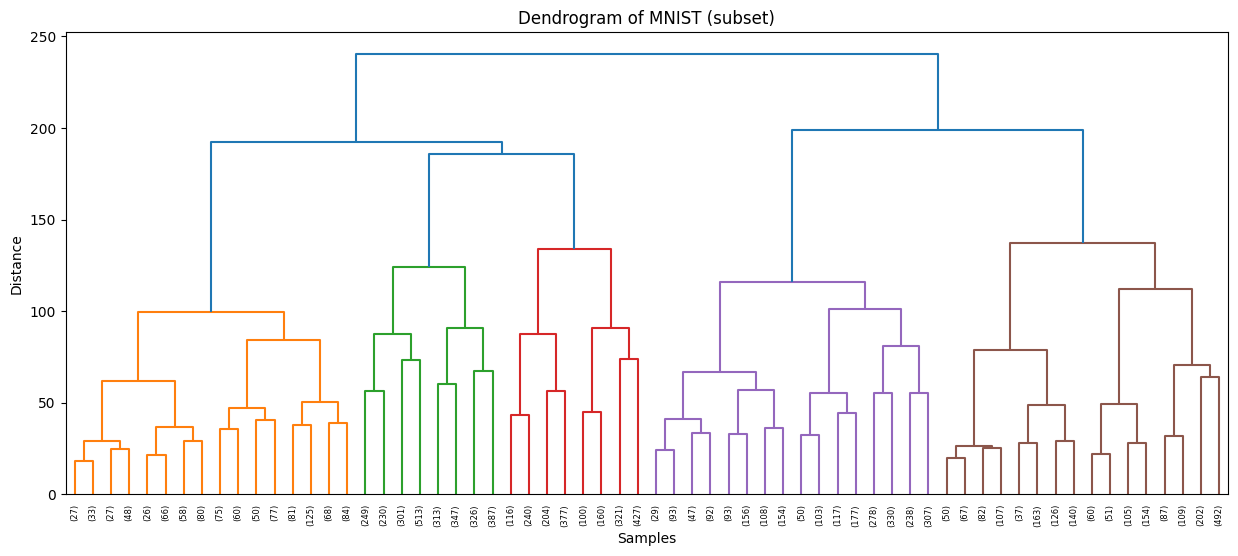

In [20]:
plt.figure(figsize=(15, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrogram of MNIST (subset)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

## 4. Visualisation by using t-SNE
Finally, t-SNE is tried fot the visualisation. Here, the results of the k-NN method are only focused.
Best perplexity is searched in terms of the silhouette score.

In [35]:
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [50]:
perplexities = [10,20,30,40,50,100]
#fig, axes = plt.subplots(2, 3, figsize=(18, 12))

X_tsne_all=[]
score_all=[]
# Create the scatter plots
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(perplexity=perplexity, random_state=290301)
    X_tsne = tsne.fit_transform(x_test)
    score = silhouette_score(X_tsne, y_pred_kNN)
    X_tsne_all.append(X_tsne)
    score_all.append(score)
    

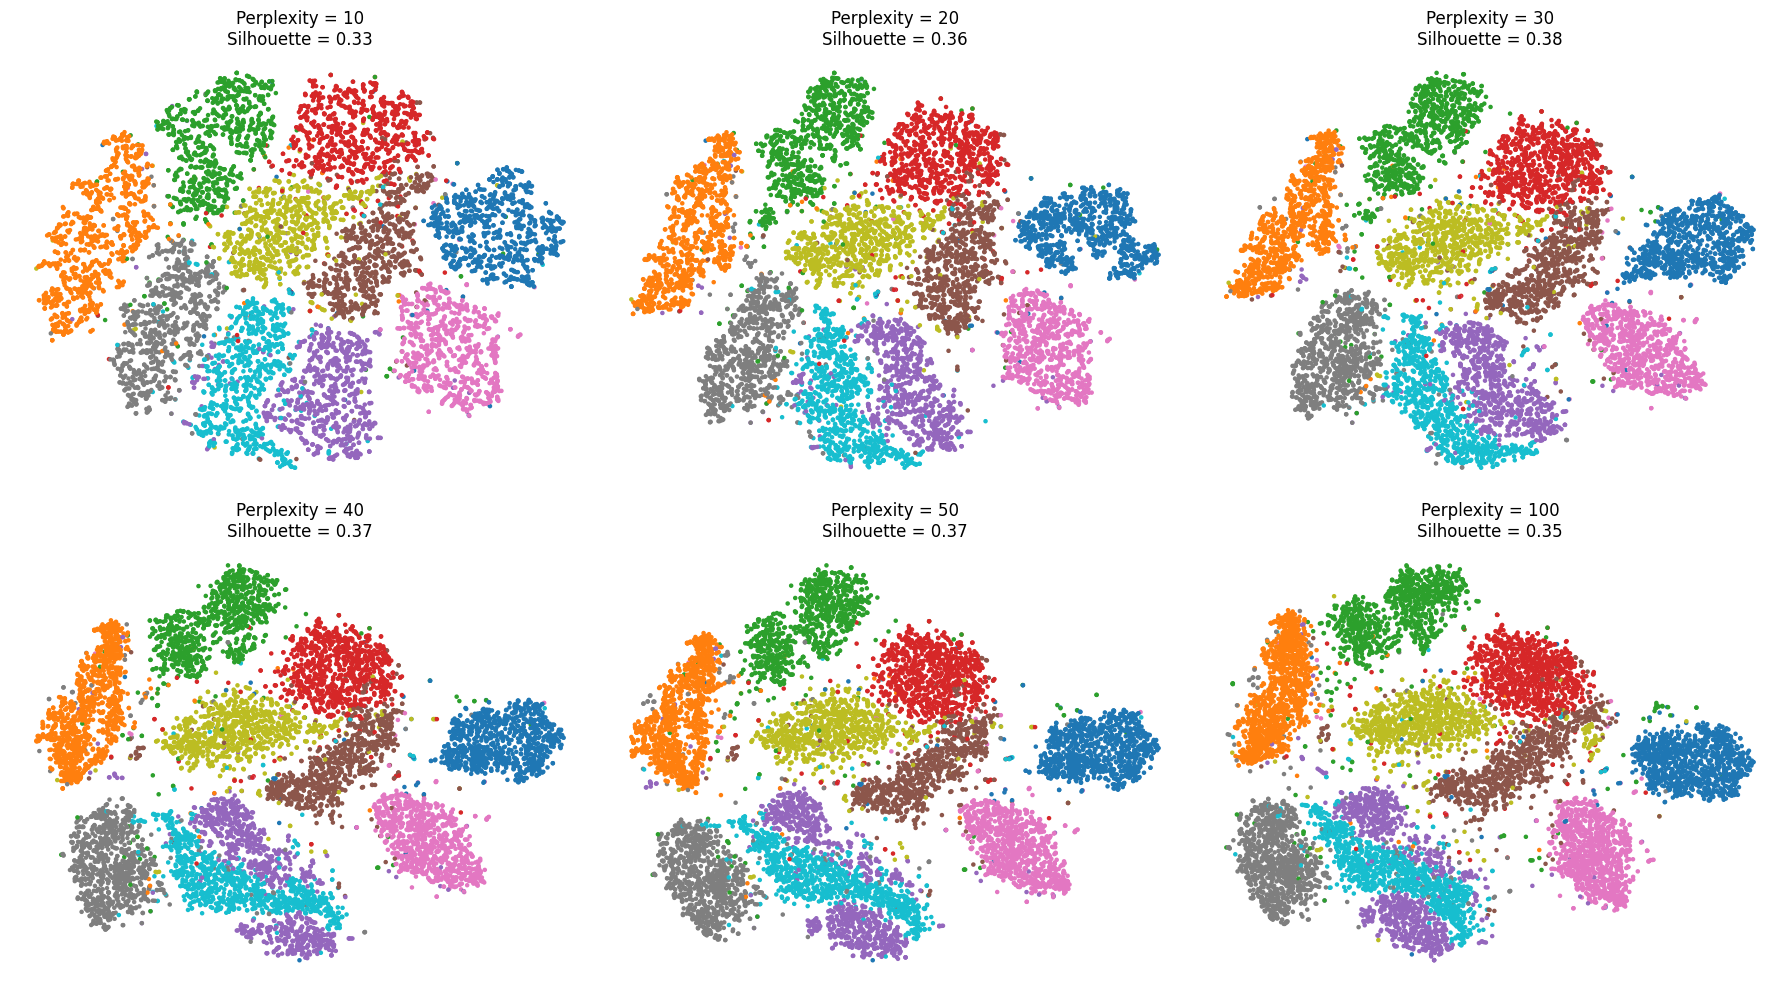

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  

for i in range(6):
    row, col = divmod(i, 3)
    ax = axes[row][col]
    
    X_tsne = X_tsne_all[i]
    score = score_all[i]
    perplexity = perplexities[i]
    
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_kNN, cmap="tab10", s=5)
    ax.set_title(f"Perplexity = {perplexity}\nSilhouette = {score:.2f}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [52]:
score_all

[np.float32(0.32535338),
 np.float32(0.3626838),
 np.float32(0.37754655),
 np.float32(0.36839104),
 np.float32(0.36566126),
 np.float32(0.35156015)]

Text(0, 0.5, 'silhouette scores')

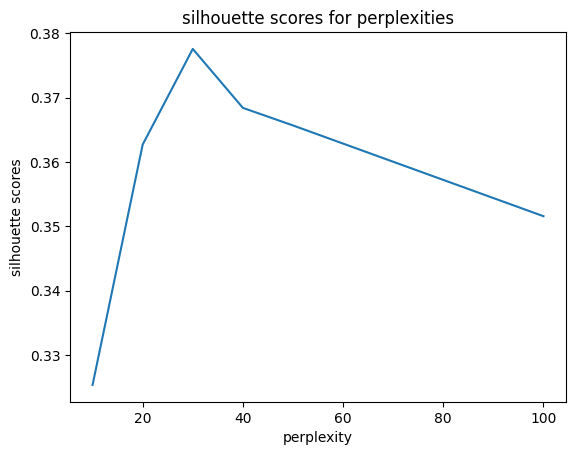

In [53]:
plt.title("silhouette scores for perplexities")
plt.plot(perplexities, score_all)
plt.xlabel("perplexity")
plt.ylabel("silhouette scores")

perplexity=40 is the best!!